In [1]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

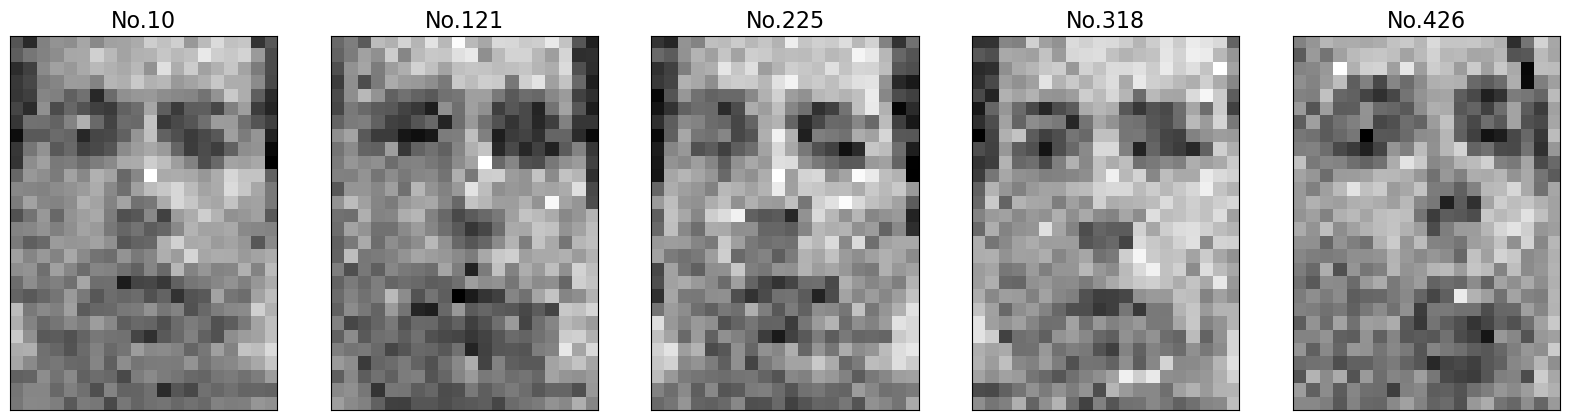

In [2]:
data = scipy.io.loadmat('04HW2_noisy.mat')
data = np.array(data['X'])
# load image
image_10 = data[:,10].reshape(28, 20)
image_121 = data[:,121].reshape(28, 20)
image_225 = data[:,225].reshape(28, 20)
image_318 = data[:,318].reshape(28, 20)
image_426 = data[:,426].reshape(28, 20)

No = [10, 121, 225, 318, 426]
tmp = 1
plt.figure(figsize = (20, 20))
for n in No:
    plt.subplot(1,5,tmp)
    tmp = tmp + 1
    plt.imshow(data[:,n].reshape(28, 20), cmap = 'gray')
    plt.title(f'No.{n}',fontsize=16)
    plt.xticks([]), plt.yticks([])

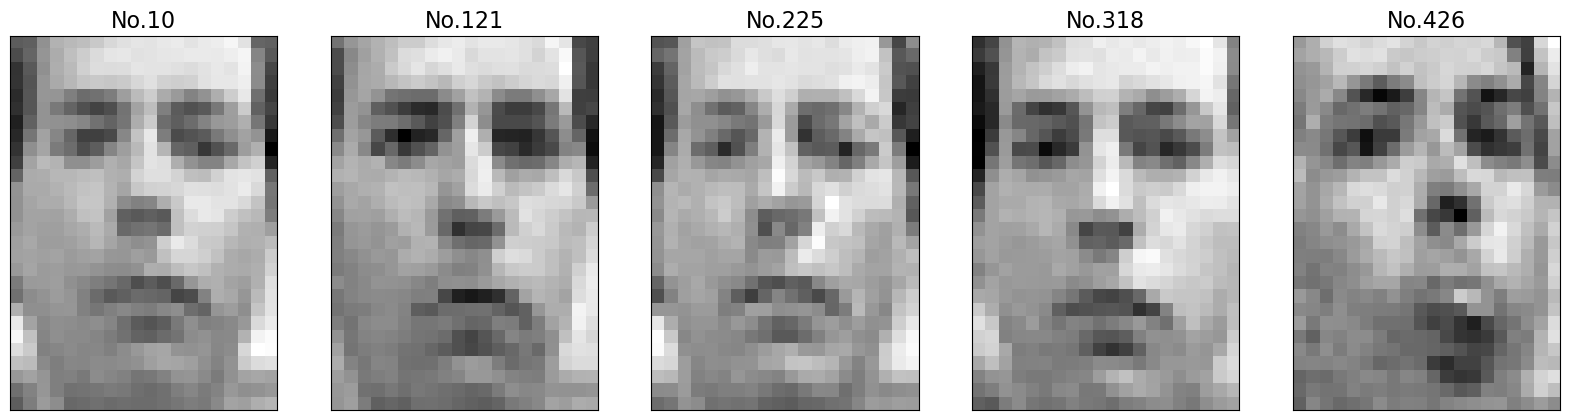

In [5]:
pca = PCA(n_components = 30)
pcs = pca.fit_transform(data)
reconstructed_image = pca.inverse_transform(pcs)

No = [10, 121, 225, 318, 426]
tmp = 1
plt.figure(figsize = (20, 20))
for n in No:
    plt.subplot(1,5,tmp)
    tmp = tmp + 1
    plt.imshow(reconstructed_image[:,n].reshape(28, 20), cmap = 'gray')
    plt.title(f'No.{n}',fontsize=16)
    plt.xticks([]), plt.yticks([])

[0. 0. 0. 0. 0. 0. 0.]
[0.49228673]
[0.49228673 0.05682596 0.03347263 0.02778897 0.01805497]
[0.49228673 0.05682596 0.03347263 0.02778897 0.01805497 0.01492328
 0.01002882 0.00922495 0.00703332 0.00651701]
[0.49228673 0.05682596 0.03347263 0.02778897 0.01805497 0.01492328
 0.01002882 0.00922495 0.00703333 0.00651701 0.00590759 0.00538265
 0.00480529 0.00425674 0.00403015]
[0.49228673 0.05682596 0.03347263 0.02778897 0.01805497 0.01492328
 0.01002882 0.00922495 0.00703333 0.00651701 0.00590759 0.00538265
 0.00480531 0.00425691 0.00403064 0.00358287 0.00336862 0.00325957
 0.00300604 0.00283051]
[0.49228673 0.05682596 0.03347263 0.02778897 0.01805497 0.01492328
 0.01002882 0.00922495 0.00703333 0.00651701 0.00590759 0.00538265
 0.00480531 0.00425693 0.00403065 0.00358292 0.0033688  0.00326007
 0.00300745 0.00283177 0.00279545 0.00265587 0.00247303 0.00238507
 0.00220338]
[0.49228673 0.05682596 0.03347263 0.02778897 0.01805497 0.01492328
 0.01002882 0.00922495 0.00703333 0.00651701 0.00590

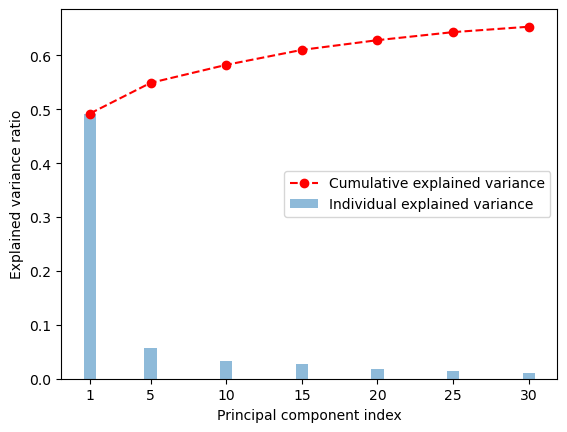

In [52]:
compo_list = [1,5,10,15,20,25,30]
tmp = 0
var_pca = np.zeros(7,)
print(var_pca)
for c in compo_list:
    pca = PCA(n_components = c)
    pcs = pca.fit_transform(data)
    print(pca.explained_variance_ratio_)
    var_pca[tmp] = float(pca.explained_variance_ratio_[tmp])
    # print(var_pca)
    cum_sum_eigenvalues = np.cumsum(var_pca)
    tmp = tmp + 1

# print(var_pca.type())
plt.bar(compo_list, var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.plot(np.array([1,5,10,15,20,25,30]),  cum_sum_eigenvalues,'ro--', label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.xticks(compo_list)
plt.legend()
plt.show()